In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import wasserstein_distance
import warnings
warnings.filterwarnings("ignore")

### Load Processed Data

In [2]:
undisturbed_traces = np.load('../data/undisturbed_processed/undisturbed.npy',allow_pickle=True)
y_undisturbed_traces = np.load('../data/undisturbed_processed/y_undisturbed.npy',allow_pickle=True)

fold1_disturbed_traces = np.load('../data/fold1_processed/disturbed.npy',allow_pickle=True)
y_fold1_disturbed_traces = np.load('../data/fold1_processed/y_disturbed.npy',allow_pickle=True)

fold2_disturbed_traces = np.load('../data/fold2_processed/disturbed.npy',allow_pickle=True)
y_fold2_disturbed_traces = np.load('../data/fold2_processed/y_disturbed.npy',allow_pickle=True)

fold3_disturbed_traces = np.load('../data/fold3_processed/disturbed.npy',allow_pickle=True)
y_fold3_disturbed_traces = np.load('../data/fold3_processed/y_disturbed.npy',allow_pickle=True)

### Data Statistics

In [3]:
# Calculate the lengths statistics of traces
undisturbed_trace_lengths = [len(trace) for trace in undisturbed_traces]
print("Undisturbed Trace Length Statistics:")
print("min", min(undisturbed_trace_lengths), "max",max(undisturbed_trace_lengths),"avg", sum(undisturbed_trace_lengths)/len(undisturbed_trace_lengths)) 

fold1_disturbed_trace_lengths = [len(trace) for trace in fold1_disturbed_traces]
print("Fold1 Disturbed Trace Length Statistics:")
print("min", min(fold1_disturbed_trace_lengths), "max",max(fold1_disturbed_trace_lengths),"avg", sum(fold1_disturbed_trace_lengths)/len(fold1_disturbed_trace_lengths)) 

fold2_disturbed_trace_lengths = [len(trace) for trace in fold2_disturbed_traces]
print("Fold2 Disturbed Trace Length Statistics:")
print("min", min(fold2_disturbed_trace_lengths), "max",max(fold2_disturbed_trace_lengths),"avg", sum(fold2_disturbed_trace_lengths)/len(fold2_disturbed_trace_lengths)) 

fold3_disturbed_trace_lengths = [len(trace) for trace in fold3_disturbed_traces]
print("Fold3 Disturbed Trace Length Statistics:")
print("min", min(fold3_disturbed_trace_lengths), "max",max(fold3_disturbed_trace_lengths),"avg", sum(fold3_disturbed_trace_lengths)/len(fold3_disturbed_trace_lengths)) 

Undisturbed Trace Length Statistics:
min 177 max 5761 avg 1636.7966101694915
Fold1 Disturbed Trace Length Statistics:
min 175 max 3122 avg 1417.6666666666667
Fold2 Disturbed Trace Length Statistics:
min 167 max 8640 avg 2030.0
Fold3 Disturbed Trace Length Statistics:
min 167 max 3121 avg 1809.2727272727273


In [ ]:
# Function to create anomaly ranges
def create_anomaly_ranges(y_labels):
    anomaly_ranges = {}
    current_tag = y_labels[0]
    start_index = 0

    for i in range(1, len(y_labels)):
        if y_labels[i] != current_tag:
            if current_tag != 0:  # Only consider non-zero (anomaly) labels
                if current_tag not in anomaly_ranges:
                    anomaly_ranges[current_tag] = []
                anomaly_ranges[current_tag].append((start_index, i - 1))
            current_tag = y_labels[i]
            start_index = i

    # Add the last range if it is an anomaly
    if current_tag != 0:
        if current_tag not in anomaly_ranges:
            anomaly_ranges[current_tag] = []
        anomaly_ranges[current_tag].append((start_index, len(y_labels) - 1))

    return anomaly_ranges

# Function to process anomaly traces for different sets
def process_anomaly_traces(y_traces):
    anomaly_ranges = {}
    for trace_index in range(len(y_traces)):
        temp_anomaly_ranges = create_anomaly_ranges(y_traces[trace_index])  
        for key, value in temp_anomaly_ranges.items():
            if key in anomaly_ranges:
                anomaly_ranges[key].extend(value)  # Append ranges if key already exists
            else:
                anomaly_ranges[key] = value  # Add new key if it doesn't exist
    return anomaly_ranges

# Process each dataset
fold1_anomaly_ranges = process_anomaly_traces(y_fold1_disturbed_traces)
fold2_anomaly_ranges = process_anomaly_traces(y_fold2_disturbed_traces)
fold3_anomaly_ranges = process_anomaly_traces(y_fold3_disturbed_traces)

# Combine all anomaly ranges into one dictionary
combined_anomaly_ranges = {}

for dataset_ranges in [fold1_anomaly_ranges, fold2_anomaly_ranges, fold3_anomaly_ranges]:
    for anomaly_type, ranges in dataset_ranges.items():
        if anomaly_type in combined_anomaly_ranges:
            combined_anomaly_ranges[anomaly_type].extend(ranges)  # Append ranges
        else:
            combined_anomaly_ranges[anomaly_type] = ranges.copy()  # Create new key

print('Fold1 Anomaly Ranges:')
print(fold1_anomaly_ranges)

print('Fold2 Anomaly Ranges:')
print(fold2_anomaly_ranges)

print('Fold3 Anomaly Ranges:')
print(fold3_anomaly_ranges)

Fold1 Anomaly Ranges:
{4: [(272, 303), (483, 547), (845, 881), (1340, 1428), (1875, 1922), (2344, 2447), (119, 182)], 1: [(902, 968), (1862, 1927), (2822, 2887), (421, 486), (901, 966), (1381, 1445), (1861, 1926), (2341, 2406), (2821, 2885)], 2: [(82, 193), (121, 174), (270, 501)], 5: [(668, 672), (2003, 2006), (168, 172), (141, 145)], 6: [(1335, 2002), (2669, 2680), (114, 120)], 7: [(34, 69), (7, 17), (267, 282), (31, 70), (26, 69)], 3: [(722, 786), (1502, 1566), (2282, 2346), (3062, 3119)]}
Fold2 Anomaly Ranges:
{2: [(41, 196), (102, 166)], 7: [(44, 76), (15, 25), (183, 192), (190, 197)], 6: [(84, 96), (121, 132), (535, 572), (1402, 1427)], 4: [(125, 170), (277, 309), (488, 551), (850, 883), (1345, 1443), (1880, 1927), (2349, 2453)], 5: [(262, 266), (1937, 1941), (201, 205)], 1: [(845, 965), (1801, 1925), (2761, 2885), (3722, 3782), (4615, 4743), (5573, 5703), (6533, 6663), (7493, 7624), (8453, 8583), (901, 965), (1861, 1925), (2821, 2890)], 3: [(721, 785), (1501, 1566), (2281, 2346)

In [5]:
# Function to calculate range statistics for each anomaly type
def calculate_range_statistics(anomaly_ranges):
    stats = {}

    for anomaly_type, ranges in anomaly_ranges.items():
        lengths = [end - start + 1 for start, end in ranges]
        num_instances = sum(lengths)  # Total count of instances in anomaly ranges
        avg_length = sum(lengths) / len(lengths) if lengths else 0
        min_length = min(lengths) if lengths else 0
        max_length = max(lengths) if lengths else 0

        stats[anomaly_type] = {
            'Average Range Length (minute)': avg_length*15/60,
            'Min Range Length (minute)': min_length*15/60,
            'Max Range Length (minute)': max_length*15/60,
            'Number Of Ranges': len(lengths),
            'Number Of Instances': num_instances
        }

    return pd.DataFrame.from_dict(stats, orient='index')

# Compute statistics for each dataset
fold1_range_stats = calculate_range_statistics(fold1_anomaly_ranges)
fold2_range_stats = calculate_range_statistics(fold2_anomaly_ranges)
fold3_range_stats = calculate_range_statistics(fold3_anomaly_ranges)
full_range_stats = calculate_range_statistics(combined_anomaly_ranges)

# Merge results into a single DataFrame for better comparison
range_stats_df = pd.concat({
    'Fold1': fold1_range_stats,
    'Fold2': fold2_range_stats,
    'Fold3': fold3_range_stats,
    'Full': full_range_stats
}, axis=1)

# Ensure anomaly types are integers and sort them in ascending order (1 to 7)
range_stats_df = range_stats_df.sort_index(key=lambda x: x.astype(int))

range_stats_df

Fold1                            \
  Average Range Length (minute) Min Range Length (minute)   
1                     16.472222                     16.25   
2                     33.166667                     13.50   
3                     15.812500                     14.50   
4                     15.678571                      8.00   
5                      1.187500                      1.00   
6                     57.250000                      1.75   
7                      7.350000                      2.75   

                                                                  \
  Max Range Length (minute) Number Of Ranges Number Of Instances   
1                     16.75                9                 593   
2                     58.00                3                 398   
3                     16.25                4                 253   
4                     26.00                7                 439   
5                      1.25                4                  19   
6                    167.00                3                 687   
7                     11.00                5                 147   

                          Fold2                            \
  Average Range Length (minute) Min Range Length (minute)   
1                     26.791667                     15.25   
2                     27.625000                     16.25   
3                     16.062500                     15.00   
4                     15.321429                      8.25   
5                      1.250000                      1.25   
6                      5.562500                      3.00   
7                      3.875000                      2.00   

                                                                  \
  Max Range Length (minute) Number Of Ranges Number Of Instances   
1                     33.00               12                1286   
2                     39.00                2                 221   
3                     16.50                4                 257   
4                     26.25                7                 429   
5                      1.25                3                  15   
6                      9.50                4                  89   
7                      8.25                4                  62   

                          Fold3                            \
  Average Range Length (minute) Min Range Length (minute)   
1                     21.687500                     16.25   
2                     47.750000                      7.75   
3                     16.281250                     14.50   
4                     15.791667                      8.25   
5                      1.250000                      1.00   
6                     11.833333                      2.75   
7                      4.000000                      1.25   

                                                                  \
  Max Range Length (minute) Number Of Ranges Number Of Instances   
1                     31.00                8                 694   
2                     87.75                2                 382   
3                     16.75                8                 521   
4                     27.50               12                 758   
5                      1.50                2                  10   
6                     27.00                3                 142   
7                      8.50                3                  48   

                           Full                            \
  Average Range Length (minute) Min Range Length (minute)   
1                     22.181034                     15.25   
2                     35.750000                      7.75   
3                     16.109375                     14.50   
4                     15.634615                      8.00   
5                      1.222222                      1.00   
6                     22.950000                      1.75   
7                      5.354167                  

In [6]:
# Concatenating undisturbed_traces
undisturbed_traces_df = pd.concat([pd.DataFrame(trace) for trace in undisturbed_traces], axis=0).reset_index(drop=True)
y_undisturbed_traces_df = pd.concat([pd.DataFrame(y) for y in y_undisturbed_traces], axis=0).reset_index(drop=True)

# Concatenating disturbed_traces
fold1_disturbed_traces_df = pd.concat([pd.DataFrame(trace) for trace in fold1_disturbed_traces], axis=0).reset_index(drop=True)
y_fold1_disturbed_traces_df = pd.concat([pd.DataFrame(y) for y in y_fold1_disturbed_traces], axis=0).reset_index(drop=True)

fold2_disturbed_traces_df = pd.concat([pd.DataFrame(trace) for trace in fold2_disturbed_traces], axis=0).reset_index(drop=True)
y_fold2_disturbed_traces_df = pd.concat([pd.DataFrame(y) for y in y_fold2_disturbed_traces], axis=0).reset_index(drop=True)

fold3_disturbed_traces_df = pd.concat([pd.DataFrame(trace) for trace in fold3_disturbed_traces], axis=0).reset_index(drop=True)
y_fold3_disturbed_traces_df = pd.concat([pd.DataFrame(y) for y in y_fold3_disturbed_traces], axis=0).reset_index(drop=True)

# Concatenating y labels with data
undisturbed_df = pd.concat([undisturbed_traces_df, y_undisturbed_traces_df.rename(columns={0: 'anomaly_type'})], axis=1)
fold1_df = pd.concat([fold1_disturbed_traces_df, y_fold1_disturbed_traces_df.rename(columns={0: 'anomaly_type'})], axis=1)
fold2_df = pd.concat([fold2_disturbed_traces_df, y_fold2_disturbed_traces_df.rename(columns={0: 'anomaly_type'})], axis=1)
fold3_df = pd.concat([fold3_disturbed_traces_df, y_fold3_disturbed_traces_df.rename(columns={0: 'anomaly_type'})], axis=1)

# Define the column names
columns = [
    'driver_Streaming_lastCompletedBatch_processingDelay_value',
    'driver_Streaming_lastCompletedBatch_schedulingDelay_value',
    'driver_Streaming_lastCompletedBatch_totalDelay_value',
    '1_diff_driver_Streaming_totalCompletedBatches_value',
    '1_diff_driver_Streaming_totalProcessedRecords_value',
    '1_diff_driver_Streaming_totalReceivedRecords_value',
    '1_diff_driver_Streaming_lastReceivedBatch_records_value',
    '1_diff_driver_BlockManager_memory_memUsed_MB_value',
    '1_diff_driver_jvm_heap_used_value',
    '1_diff_node5_CPU_ALL_Idle%',
    '1_diff_node6_CPU_ALL_Idle%',
    '1_diff_node7_CPU_ALL_Idle%',
    '1_diff_node8_CPU_ALL_Idle%',
    '1_diff_avg_executor_filesystem_hdfs_write_ops_value',
    '1_diff_avg_executor_cpuTime_count',
    '1_diff_avg_executor_runTime_count',
    '1_diff_avg_executor_shuffleRecordsRead_count',
    '1_diff_avg_executor_shuffleRecordsWritten_count',
    '1_diff_avg_jvm_heap_used_value'
]

# Renaming the columns of the DataFrame
undisturbed_df.columns = columns + ['anomaly_type']
fold1_df.columns = columns + ['anomaly_type']
fold2_df.columns = columns + ['anomaly_type']
fold3_df.columns = columns + ['anomaly_type']

# Change the undisturbed traces anomoly_type as -1 to show that it is a undisturbed trace
undisturbed_df['anomaly_type'] = -1

# Combine the disturbed and undisturbed dataframes into one
df = pd.concat([undisturbed_df, fold1_df]).reset_index(drop=True)
df = pd.concat([df, fold2_df]).reset_index(drop=True)
df = pd.concat([df, fold3_df]).reset_index(drop=True)

df.head()



,driver_Streaming_lastCompletedBatch_processingDelay_value,driver_Streaming_lastCompletedBatch_schedulingDelay_value,driver_Streaming_lastCompletedBatch_totalDelay_value,1_diff_driver_Streaming_totalCompletedBatches_value,1_diff_driver_Streaming_totalProcessedRecords_value,1_diff_driver_Streaming_totalReceivedRecords_value,1_diff_driver_Streaming_lastReceivedBatch_records_value,1_diff_driver_BlockManager_memory_memUsed_MB_value,1_diff_driver_jvm_heap_used_value,1_diff_node5_CPU_ALL_Idle%,1_diff_node6_CPU_ALL_Idle%,1_diff_node7_CPU_ALL_Idle%,1_diff_node8_CPU_ALL_Idle%,1_diff_avg_executor_filesystem_hdfs_write_ops_value,1_diff_avg_executor_cpuTime_count,1_diff_avg_executor_runTime_count,1_diff_avg_executor_shuffleRecordsRead_count,1_diff_avg_executor_shuffleRecordsWritten_count,1_diff_avg_jvm_heap_used_value,anomaly_type
0,-8.541371,-0.105966,-8.495135,-7.601268,-17.305429,-20.597615,17.365627,3.452314,1.544019,0.109268,1.528067,-0.365808,-0.056786,-0.177851,-0.141896,-0.043168,-0.266170,-0.261190,1.159091,-1
1,0.494115,-0.001009,0.491936,-7.601268,-17.305429,-20.597615,17.365627,3.452314,1.544019,0.109268,1.528067,-0.365808,-0.056786,-0.177851,-0.141896,-0.043168,-0.266170,-0.261190,1.159091,-1
2,0.240847,-0.051794,0.233516,0.950211,0.198558,0.532666,4.666899,0.798341,-0.045859,-0.025480,-0.552766,0.007892,-1.126390,0.028788,0.081545,0.106773,0.016098,0.035704,1.724885,-1
3,-0.099755,-0.017937,-0.101048,0.014893,-0.310304,-0.446926,-0.040911,0.059158,-1.373796,-1.331595,-1.222106,-0.020977,-1.751193,0.008440,0.057449,0.062447,-0.023261,0.011736,-0.049400,-1
4,1.092749,-0.055180,1.079790,-0.920425,-0.173810,0.532366,-0.043027,0.707944,0.722801,0.730312,0.479626,-1.209440,-2.504429,0.035810,0.054118,0.057087,0.012883,-0.013474,1.282033,-1


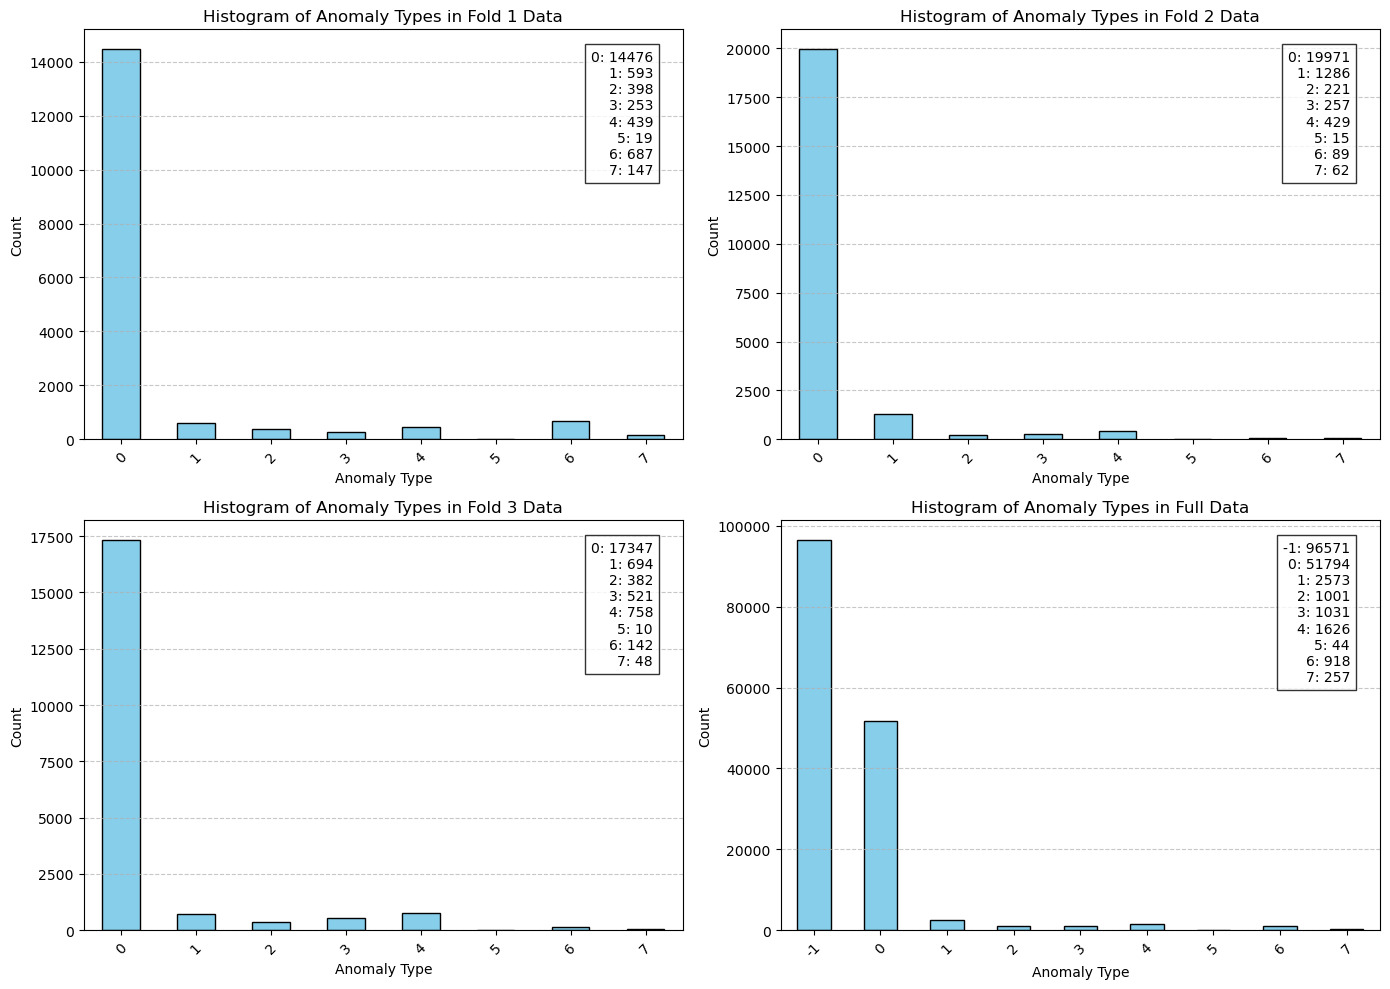

In [7]:
# Function to plot histograms and display counts inside the figure
def plot_histograms_with_counts(fold1_df, fold2_df, fold3_df, df):
    datasets = [fold1_df, fold2_df, fold3_df, df]
    titles = ["Fold 1 Data", "Fold 2 Data", "Fold 3 Data", "Full Data"]

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid of subplots

    for ax, data, title in zip(axes.flatten(), datasets, titles):
        # Count anomalies and sort by index (anomaly type)
        anomaly_counts = data['anomaly_type'].value_counts().sort_index()

        # Plot histogram with sorted order
        anomaly_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
        ax.set_title(f"Histogram of Anomaly Types in {title}")
        ax.set_xlabel("Anomaly Type")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis="y", linestyle="--", alpha=0.7)

        # Format counts as text inside the subplot
        count_text = "\n".join([f"{idx}: {fold2}" for idx, fold2 in anomaly_counts.items()])
        ax.text(0.95, 0.95, count_text, transform=ax.transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='right',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

    plt.tight_layout()
    plt.show()

# Call the function
plot_histograms_with_counts(fold1_df, fold2_df, fold3_df, df)



### Undisturbed vs Disturbed Normal Similarity Analysis

In [8]:
driver_features = [
    'driver_Streaming_lastCompletedBatch_processingDelay_value',
    'driver_Streaming_lastCompletedBatch_schedulingDelay_value',
    'driver_Streaming_lastCompletedBatch_totalDelay_value',
    '1_diff_driver_Streaming_totalCompletedBatches_value',
    '1_diff_driver_Streaming_totalProcessedRecords_value',
    '1_diff_driver_Streaming_totalReceivedRecords_value',
    '1_diff_driver_Streaming_lastReceivedBatch_records_value',
    '1_diff_driver_BlockManager_memory_memUsed_MB_value',
    '1_diff_driver_jvm_heap_used_value'
]

executor_features = [
    '1_diff_avg_executor_filesystem_hdfs_write_ops_value',
    '1_diff_avg_executor_cpuTime_count',
    '1_diff_avg_executor_runTime_count',
    '1_diff_avg_executor_shuffleRecordsRead_count',
    '1_diff_avg_executor_shuffleRecordsWritten_count',
    '1_diff_avg_jvm_heap_used_value'
]

os_features = [
    '1_diff_node5_CPU_ALL_Idle%',
    '1_diff_node6_CPU_ALL_Idle%',
    '1_diff_node7_CPU_ALL_Idle%',
    '1_diff_node8_CPU_ALL_Idle%'
]

anomaly_types = {
    -1: 'Undisturbed\nTrace Normal',
    0: 'Disturbed\nTrace Normal', 
    1: 'Bursty Input', 
    2: 'Bursty Input\nUntil Crash', 
    3: 'Stalled Input',  
    4: 'CPU Contention',  
    5: 'Driver Failure', 
    6: 'Executor Failure',
    7: 'Unknown'
}


driver_feature_name_mapping = {
    'driver_Streaming_lastCompletedBatch_processingDelay_value': 'Driver Streaming Last Completed Batch Processing Delay',
    'driver_Streaming_lastCompletedBatch_schedulingDelay_value': 'Driver Streaming Last Completed Batch Scheduling Delay',
    'driver_Streaming_lastCompletedBatch_totalDelay_value': 'Driver Streaming Last Completed Batch Total Delay',
    '1_diff_driver_Streaming_totalCompletedBatches_value': '1 Diff Driver Streaming Total Completed Batches',
    '1_diff_driver_Streaming_totalProcessedRecords_value': '1 Diff Driver Streaming Total Processed Records',
    '1_diff_driver_Streaming_totalReceivedRecords_value': '1 Diff Driver Streaming Total Received Records',
    '1_diff_driver_Streaming_lastReceivedBatch_records_value': '1 Diff Driver Streaming Last Received Batch Records',
    '1_diff_driver_BlockManager_memory_memUsed_MB_value': '1 Diff Driver Block Manager Memory Mem Used MB',
    '1_diff_driver_jvm_heap_used_value': '1 Diff Driver JVM Heap Used'
}

executor_feature_name_mapping = {
    '1_diff_avg_executor_filesystem_hdfs_write_ops_value': '1 Diff Avg Executor Filesystem HDFS Write Ops',
    '1_diff_avg_executor_cpuTime_count': '1 Diff Avg Executor CPU Time Count',
    '1_diff_avg_executor_runTime_count': '1 Diff Avg Executor Run Time Count',
    '1_diff_avg_executor_shuffleRecordsRead_count': '1 Diff Avg Executor Shuffle Records Read Count',
    '1_diff_avg_executor_shuffleRecordsWritten_count': '1 Diff Avg Executor Shuffle Records Written Count',
    '1_diff_avg_jvm_heap_used_value': '1 Diff Avg Executor JVM Heap Used'
}

os_feature_name_mapping = {
    '1_diff_node5_CPU_ALL_Idle%': '1 Diff Node5 CPU ALL Idle%',
    '1_diff_node6_CPU_ALL_Idle%': '1 Diff Node6 CPU ALL Idle%',
    '1_diff_node7_CPU_ALL_Idle%': '1 Diff Node7 CPU ALL Idle%',
    '1_diff_node8_CPU_ALL_Idle%': '1 Diff Node8 CPU ALL Idle%'
}


In [9]:
def plot_undisturbed_vs_disturbed(features, feature_name_mapping, category_name, df):
    """
    Plots KDE distributions for given features, with feature name mapping 
    and outlier remofold2 using 10th and 90th percentile thresholds.
    
    Args:
        features (list): List of feature names.
        feature_name_mapping (dict): Dictionary mapping raw feature names to human-readable names.
        category_name (str): Category name for title.
        df (DataFrame): The dataset containing feature values and anomaly labels.
    """
    num_features = len(features)
    num_cols = 3  # Set to 3 for better spacing
    num_rows = -(-num_features // num_cols)  # Ceiling division for row count

    # Create figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        pretty_name = feature_name_mapping.get(feature, feature)  # Map feature name
        
        # Compute 10th and 90th percentiles
        q10, q90 = np.percentile(df[feature].dropna(), [10, 90])

        # Filter dataset based on percentile thresholds
        filtered_df = df[(df[feature] >= q10) & (df[feature] <= q90)]

        # KDE plots with strong blue for "Undisturbed"
        sns.kdeplot(filtered_df[filtered_df["anomaly_type"] == -1][feature], 
                    label="Undisturbed", fill=True, 
                    alpha=1, color="#1f77b4", linewidth=2, bw_adjust=0.8, ax=axes[i])

        sns.kdeplot(filtered_df[filtered_df["anomaly_type"] == 0][feature], 
                    label="Disturbed", fill=True, 
                    alpha=0.3, color="#ff7f0e", linewidth=1.5, bw_adjust=0.8, ax=axes[i])

        axes[i].set_title(f'{pretty_name}', fontsize=14)  # Use mapped name in title
        axes[i].set_xlabel("Value", fontsize=12)
        axes[i].set_ylabel("Density", fontsize=12)
        axes[i].legend(fontsize=12)
        axes[i].grid(axis="y", linestyle="--", alpha=0.6)  # Add grid lines for readability

    # Remove empty subplots if the number of features is odd
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'{category_name} Features', fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


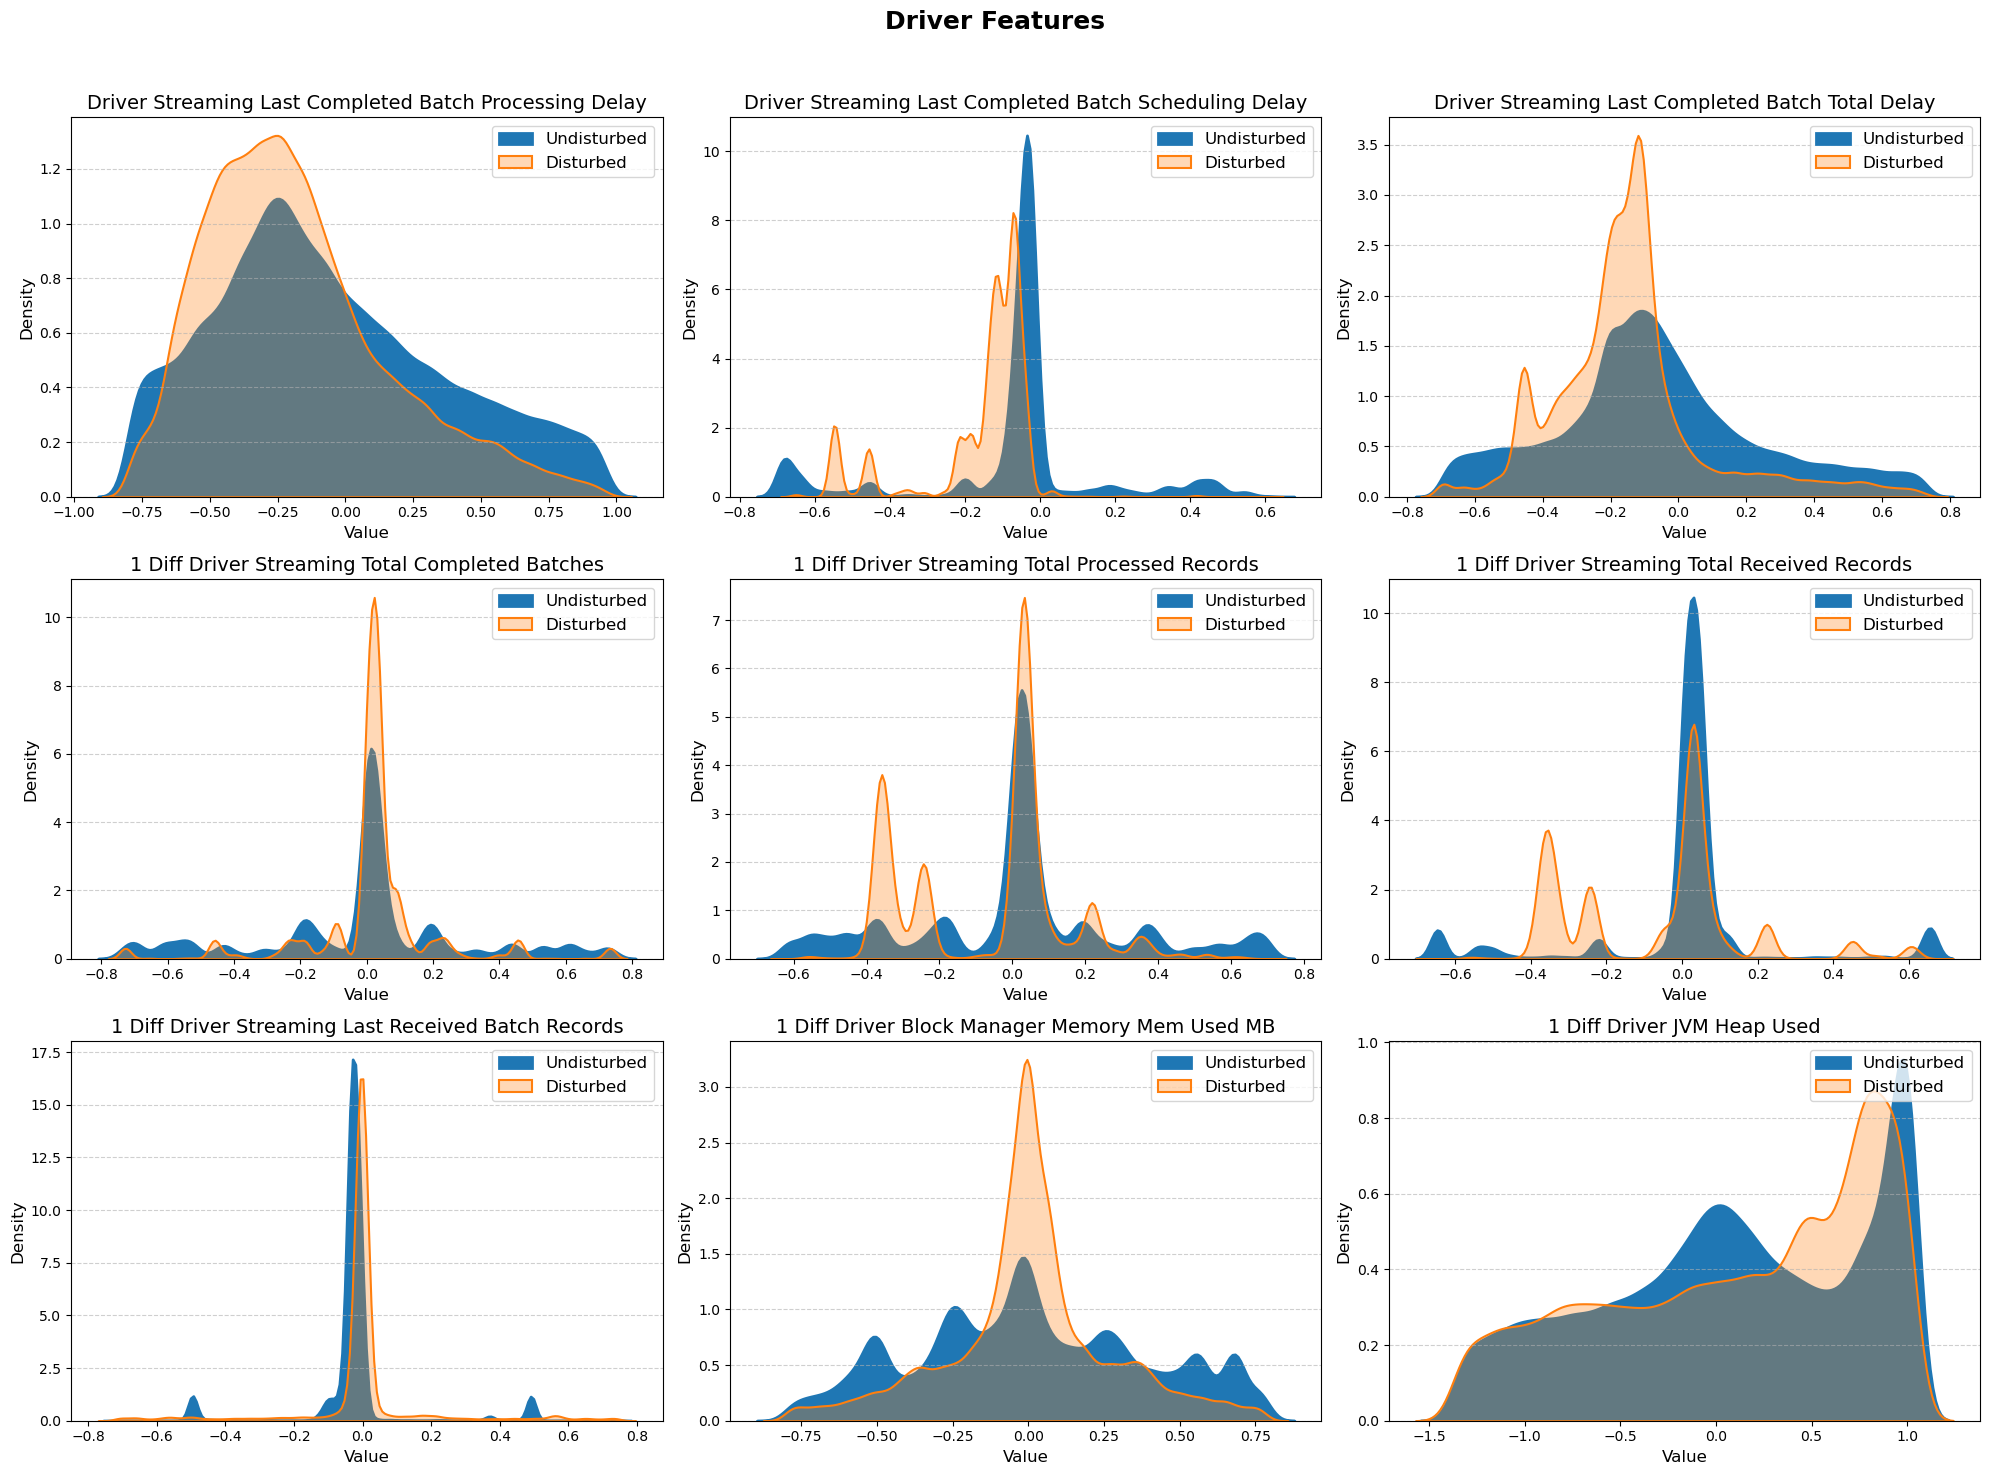

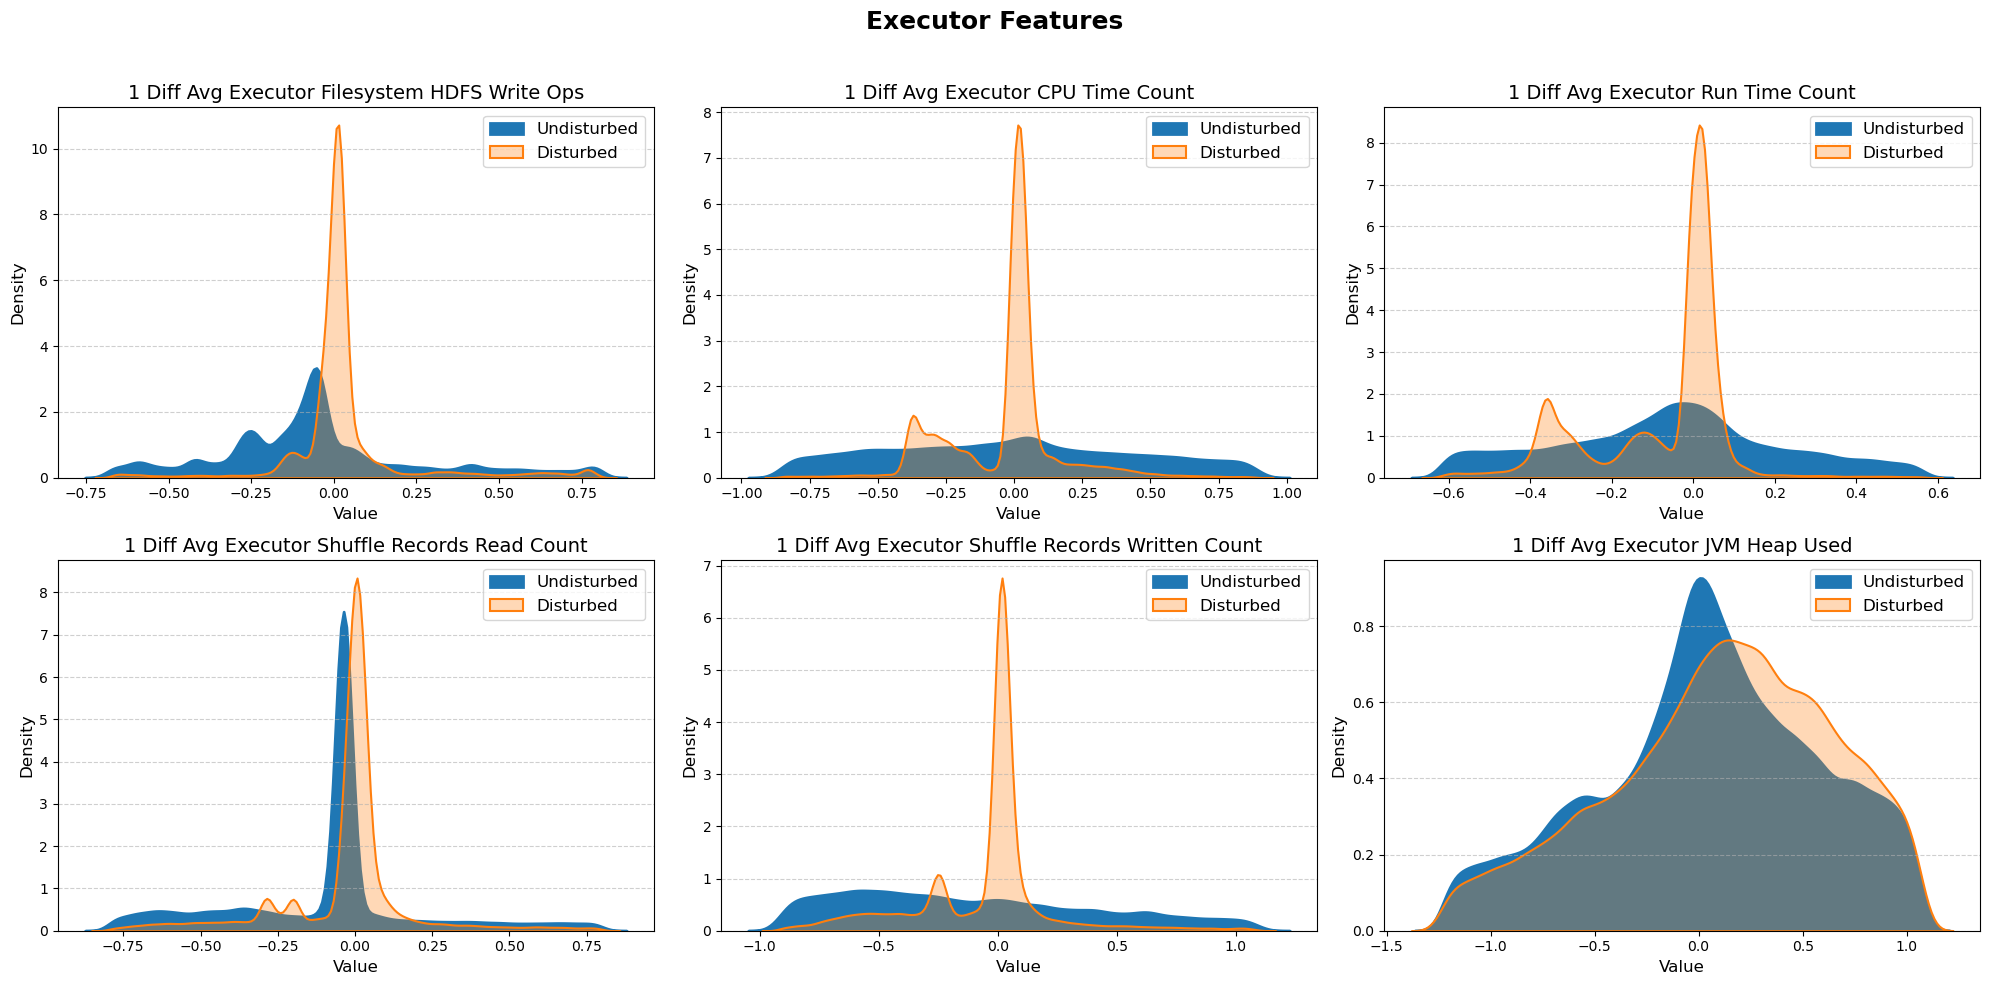

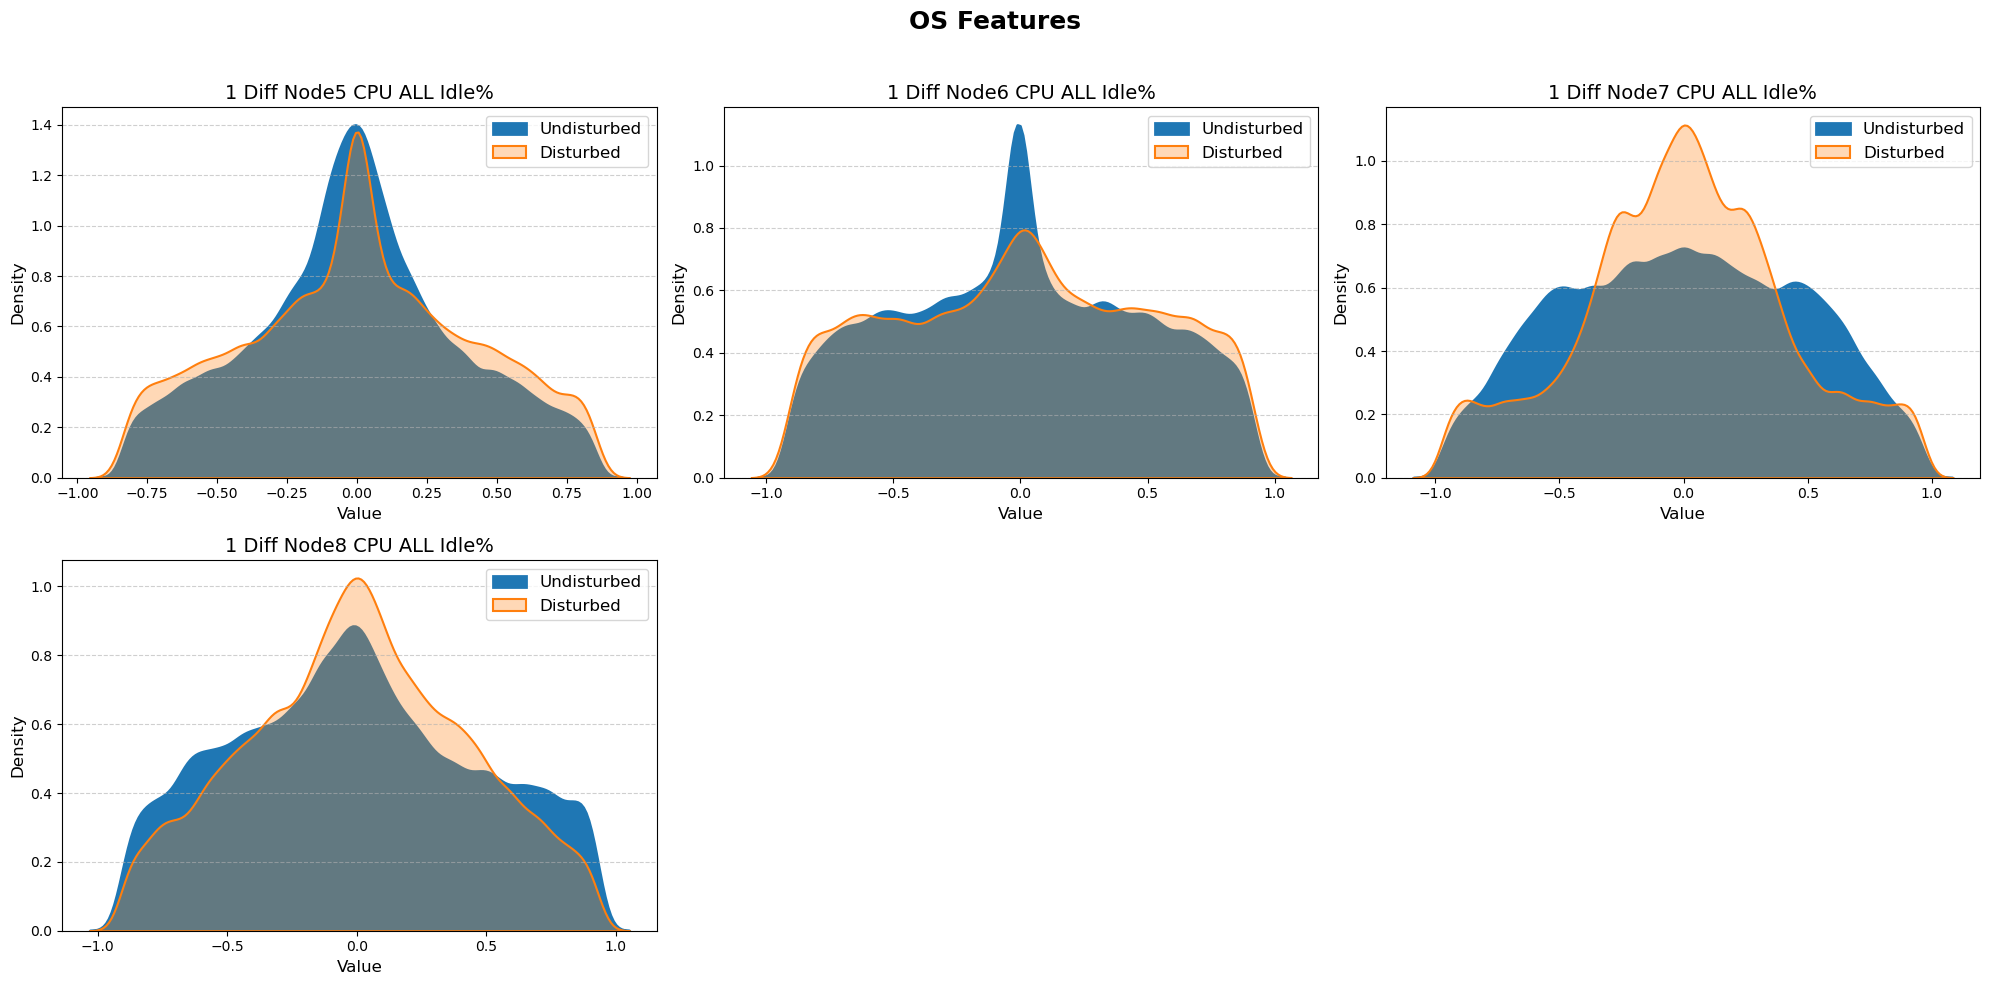

In [10]:
plot_undisturbed_vs_disturbed(driver_features, driver_feature_name_mapping, 'Driver', df)
plot_undisturbed_vs_disturbed(executor_features, executor_feature_name_mapping, 'Executor', df)
plot_undisturbed_vs_disturbed(os_features, os_feature_name_mapping, 'OS', df)


In [11]:
def compute_emd_across_labels(df, feature_list, group1, group2):
    """
    Compute the Earth Mover's Distance (EMD, or Wasserstein Distance) between two groups across multiple features.

    Parameters:
    - df: Pandas DataFrame containing the features and labels
    - feature_list: List of feature column names to compare
    - group1: List of labels representing the first group
    - group2: List of labels representing the second group

    Returns:
    - Mean EMD value across all features
    """
    emd_values = []

    for feature in feature_list:
        # Extract feature distributions for both groups
        dist1 = df[df["anomaly_type"].isin(group1)][feature].dropna()
        dist2 = df[df["anomaly_type"].isin(group2)][feature].dropna()

        # Compute Wasserstein Distance (EMD)
        emd = wasserstein_distance(dist1, dist2)
        emd_values.append(emd)

    # Return mean EMD across all features
    return np.mean(emd_values)



def compute_emd_across_folds(folds, features, labels):
    """
    Computes the average Earth Mover's Distance (Wasserstein Distance) for individual features 
    across multiple folds. Each fold is compared against all other folds.

    Args:
        folds (dict): Dictionary containing fold dataframes, e.g., {"Fold1": df1, "Fold2": df2, "Fold3": df3}.
        features (list): List of feature names to compare.
        labels (list): List of anomaly labels to compare.

    Returns:
        dict: Nested dictionary with pairwise fold comparisons containing mean EMD per anomaly label.
    """
    results = {}

    # Extract fold names
    fold_names = list(folds.keys())

    # Compare each fold pair
    for i in range(len(fold_names)):
        for j in range(i + 1, len(fold_names)):  # Avoid redundant comparisons
            fold1_name, fold2_name = fold_names[i], fold_names[j]
            df1, df2 = folds[fold1_name], folds[fold2_name]

            pair_key = f"{fold1_name} vs. {fold2_name}"
            results[pair_key] = {}

            for label in labels:
                emd_values = []  # Store EMD per feature
                
                for feature in features:
                    # Extract feature distributions for both folds
                    group1 = df1[df1["anomaly_type"] == label][feature].dropna()
                    group2 = df2[df2["anomaly_type"] == label][feature].dropna()

                    if len(group1) == 0 or len(group2) == 0:
                        continue  # Skip if either group is empty

                    # Compute EMD for this feature
                    emd_value = wasserstein_distance(group1, group2)
                    emd_values.append(emd_value)

                # Store the mean EMD across all features for this label
                if emd_values:
                    results[pair_key][label] = np.mean(emd_values)

    return results  # Return structured dictionary

In [12]:
# Compare "Undisturbed" (-1, 0) vs. Each Anomaly Type (1 to 7)
print("\n### EMD Comparison: 'Undisturbed' (-1, 0) vs. Each Anomaly Type (1-7) ###\n")

# Define feature groups (combine all features)
all_features = driver_features + executor_features + os_features

for i in range(1, 8):
    group1 = [-1, 0]  # Normal data
    group2 = [i]  # Single anomaly type
    
    # Compute EMD for different feature groups
    emd_results = compute_emd_across_labels(df, all_features, group1, group2)

    print(f"Anomaly Type {i}:  EMD = {emd_results:.6f}")


print("\n### EMD Comparison: 'Undisturbed Normal' (-1) vs. Disturbed Normal (0) ###\n")

group1 = [-1]  # Undisturbed normal
group2 = [0]  # Disturbed normal

# Compute EMD for different feature groups
emd_results = compute_emd_across_labels(df, all_features, group1, group2)

print(f"Undisturbed (-1) vs. Disturbed Normal (0): EMD = {emd_results:.6f}\n")


### EMD Comparison: 'Undisturbed' (-1, 0) vs. Each Anomaly Type (1-7) ###

Anomaly Type 1:  EMD = 1.014488
Anomaly Type 2:  EMD = 0.439955
Anomaly Type 3:  EMD = 0.747946
Anomaly Type 4:  EMD = 0.444972
Anomaly Type 5:  EMD = 3.109391
Anomaly Type 6:  EMD = 0.502267
Anomaly Type 7:  EMD = 0.605660

### EMD Comparison: 'Undisturbed Normal' (-1) vs. Disturbed Normal (0) ###

Undisturbed (-1) vs. Disturbed Normal (0): EMD = 0.257593



### Feature Visualization for Each Anomaly Category

In [13]:

def plot_feature_category(features, feature_name_mapping, category_name, df):

    # Define the explicit order for plotting
    anomaly_order = list(anomaly_types.values())  # This ensures the correct x-axis order

    num_features = len(features)
    n_cols = 2  # Two subplots per row
    n_rows = (num_features + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 8))  # Increased figure size
    axes = axes.flatten()

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # Suppress warnings

        for i, feature in enumerate(features):
            pretty_name = feature_name_mapping.get(feature, feature)

            # Map anomaly_type values to descriptive labels
            df['anomaly_type_label'] = df['anomaly_type'].map(anomaly_types)

            sns.violinplot(
                x='anomaly_type_label', y=feature, data=df, ax=axes[i], 
                inner="point", scale="width", order=anomaly_order  # Enforcing the correct order
            )

            axes[i].set_title(f'{pretty_name} by Trace Type and Anomaly Type', fontsize=14)
            axes[i].set_xlabel('Anomaly Type', fontsize=12)
            axes[i].set_ylabel(pretty_name, fontsize=12)

            # Rotate labels for better readability
            axes[i].tick_params(axis='x', rotation=30)  # Adjust rotation for better readability
            axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines

    if num_features % 2 != 0:
        fig.delaxes(axes[-1])

    plt.suptitle(f'{category_name} Features', fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

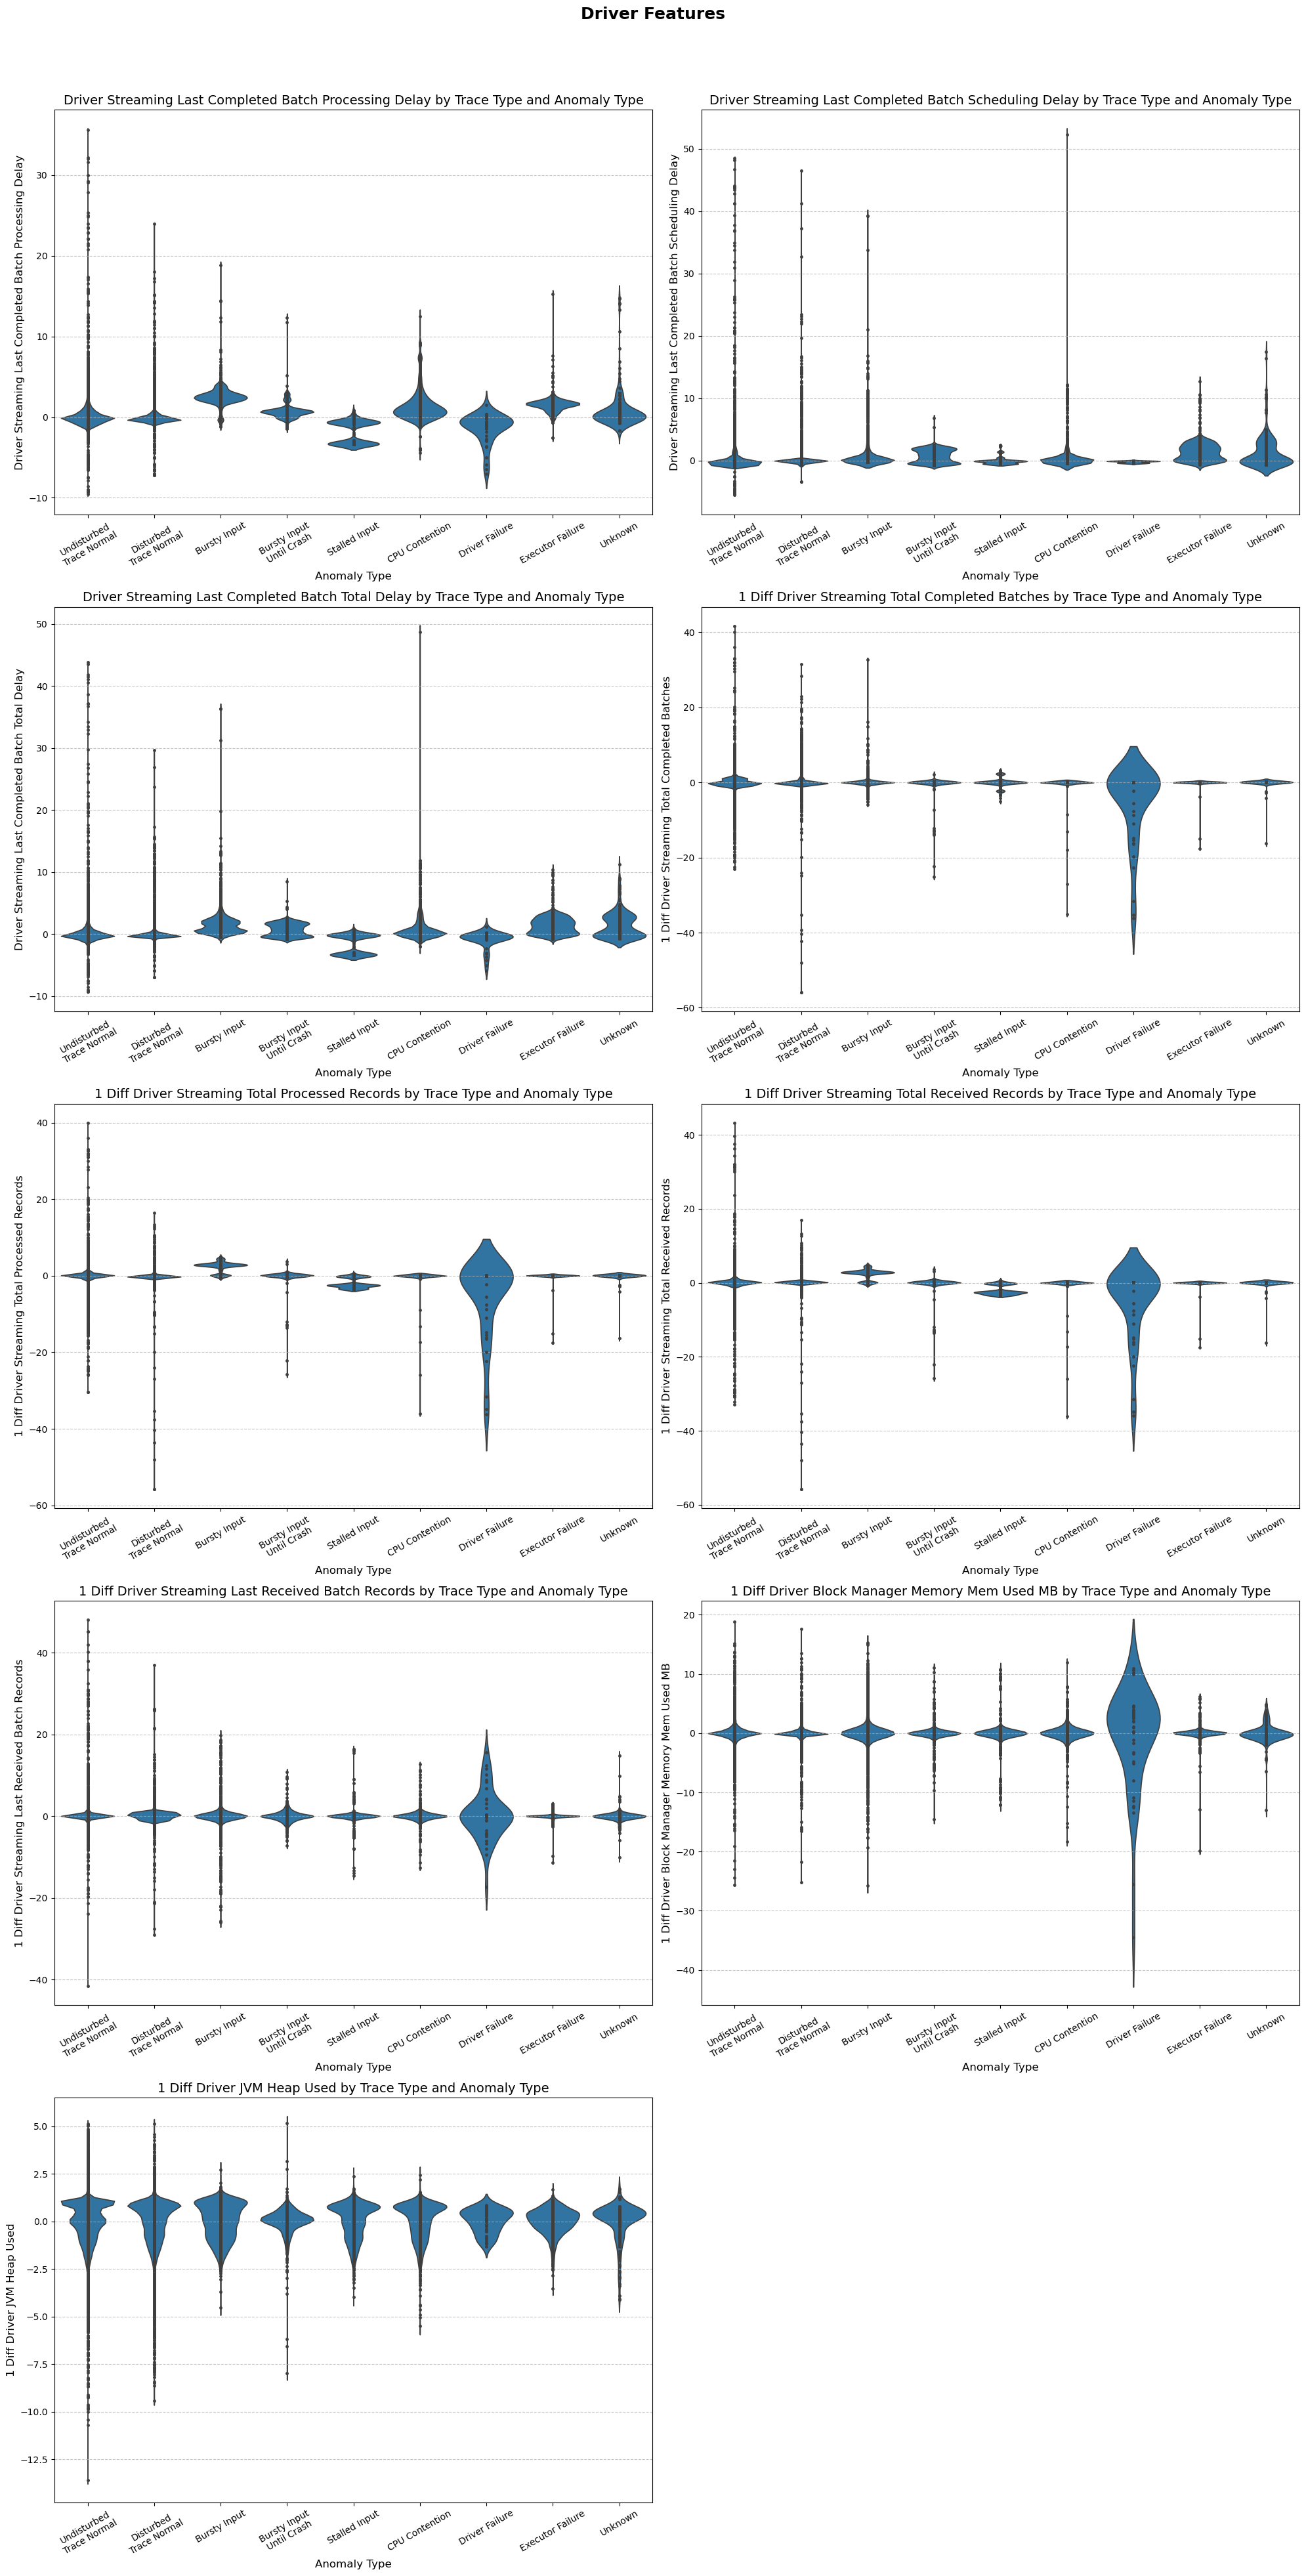

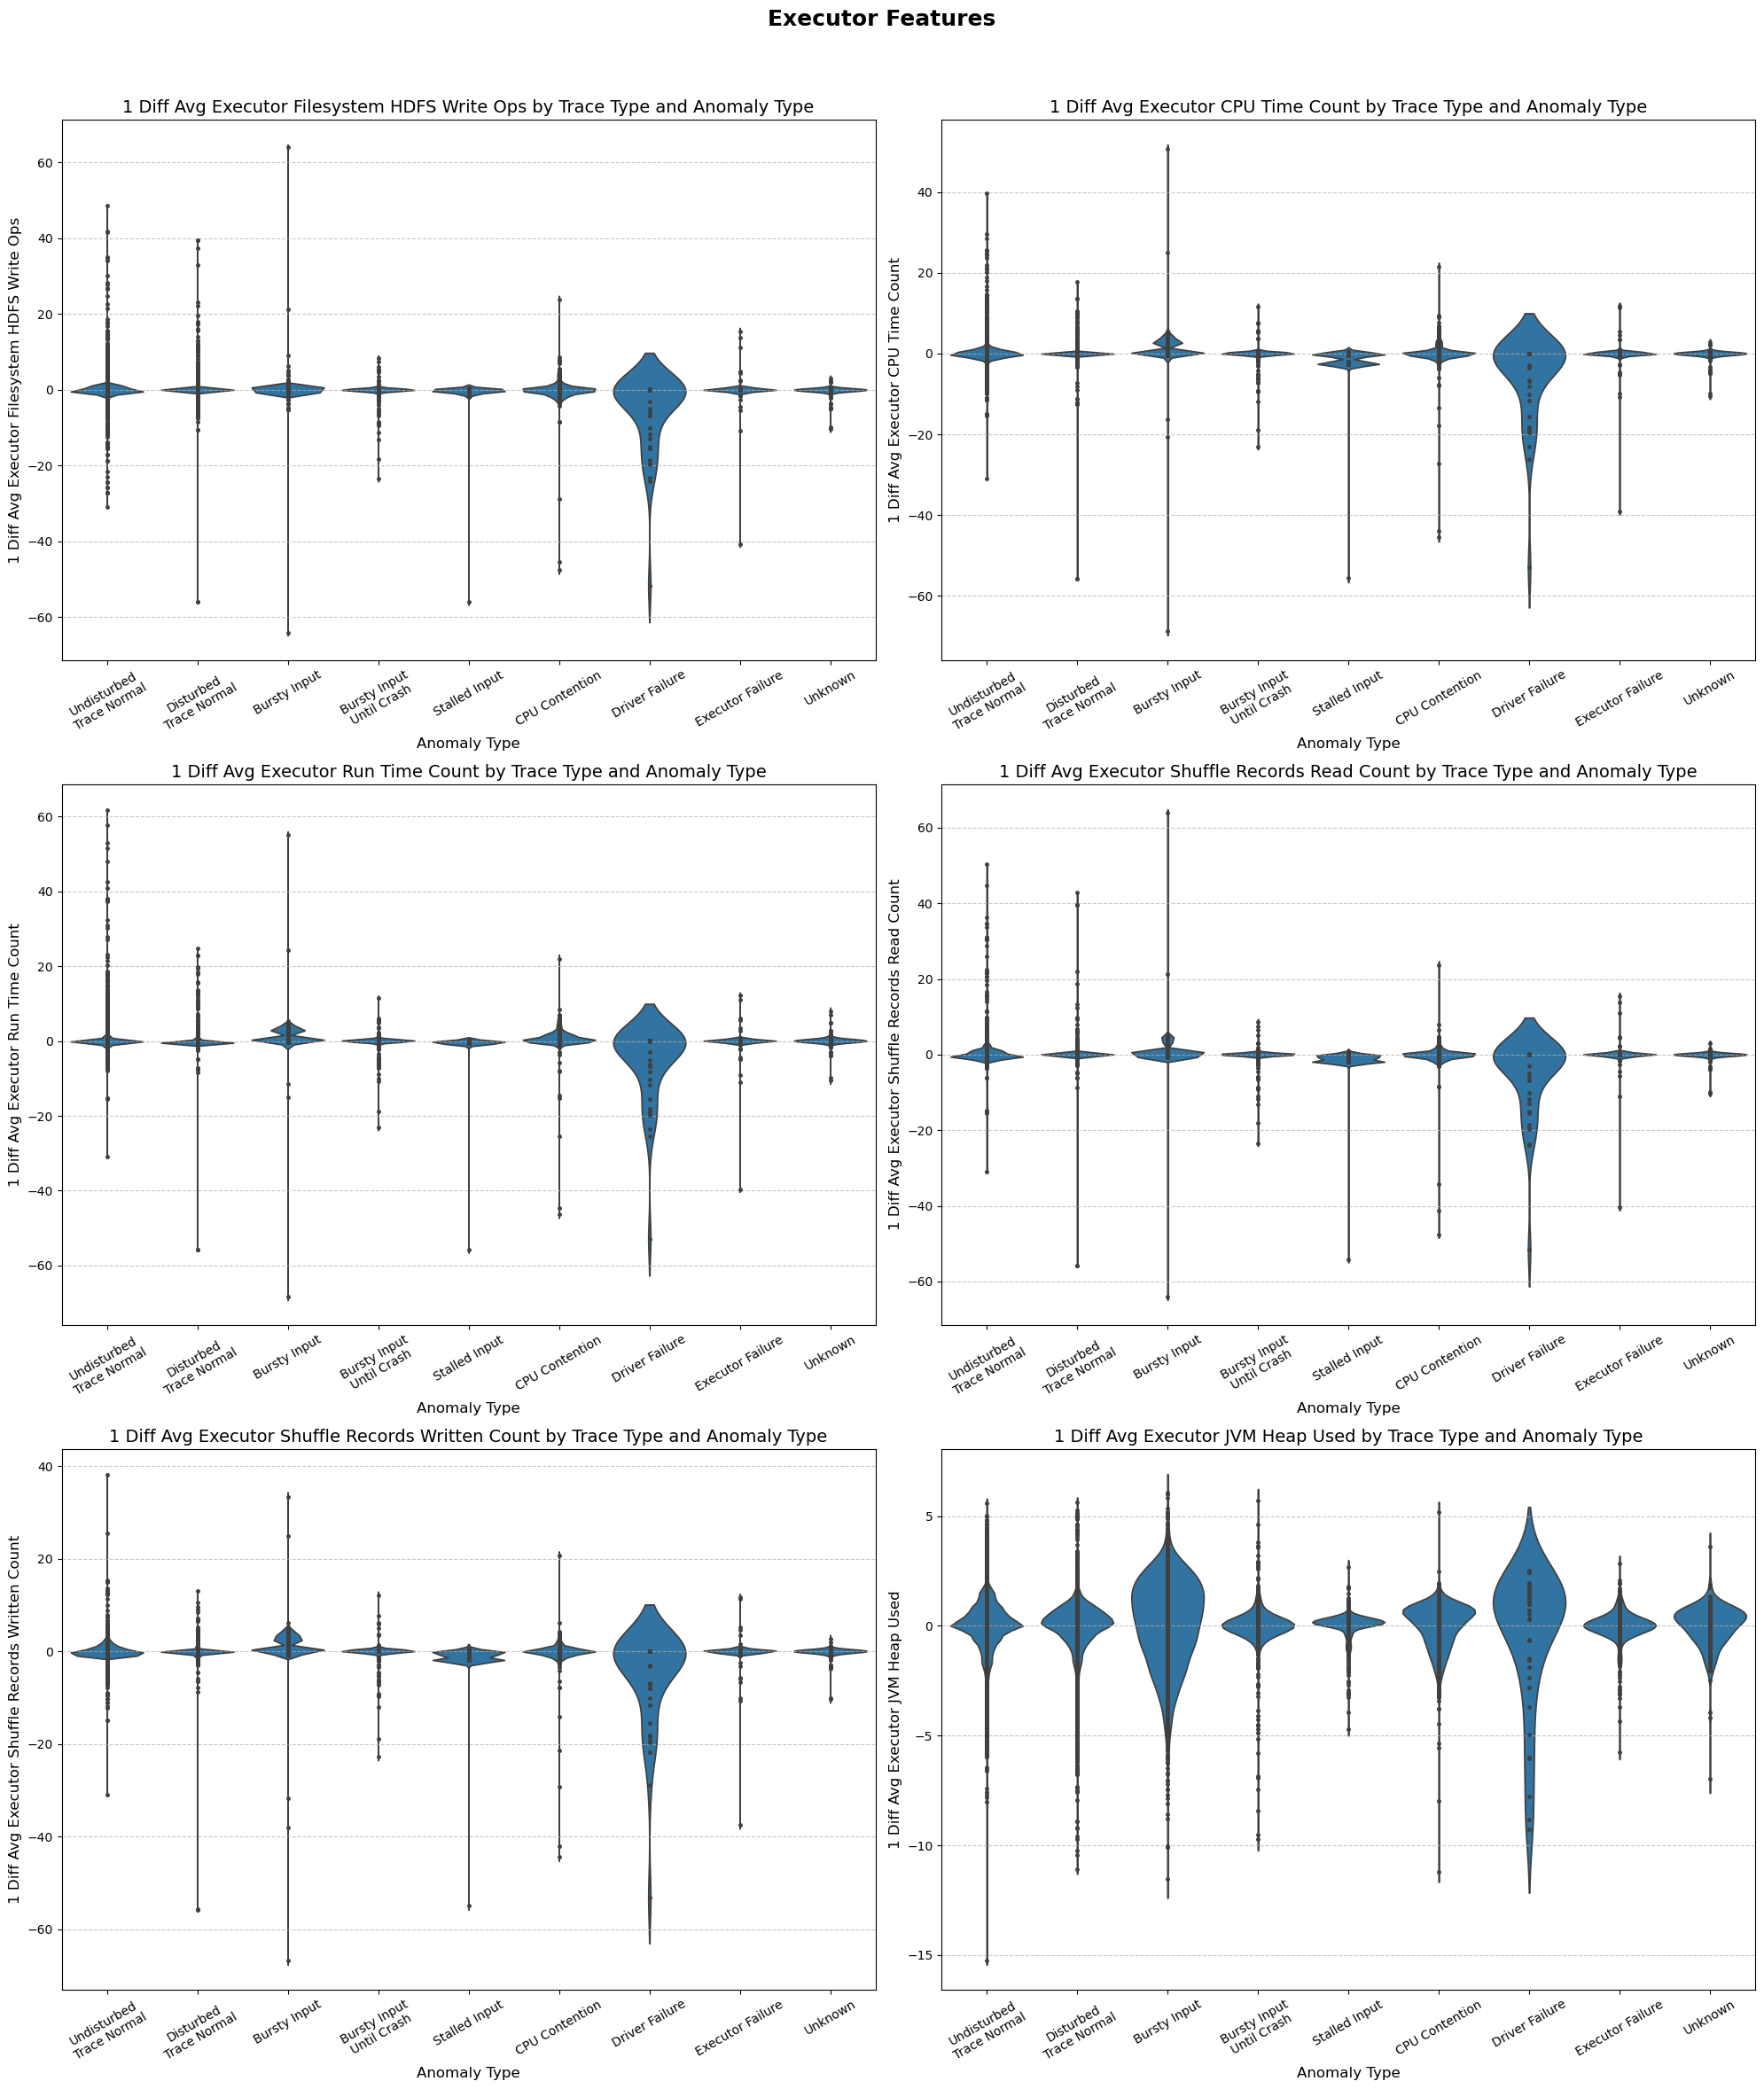

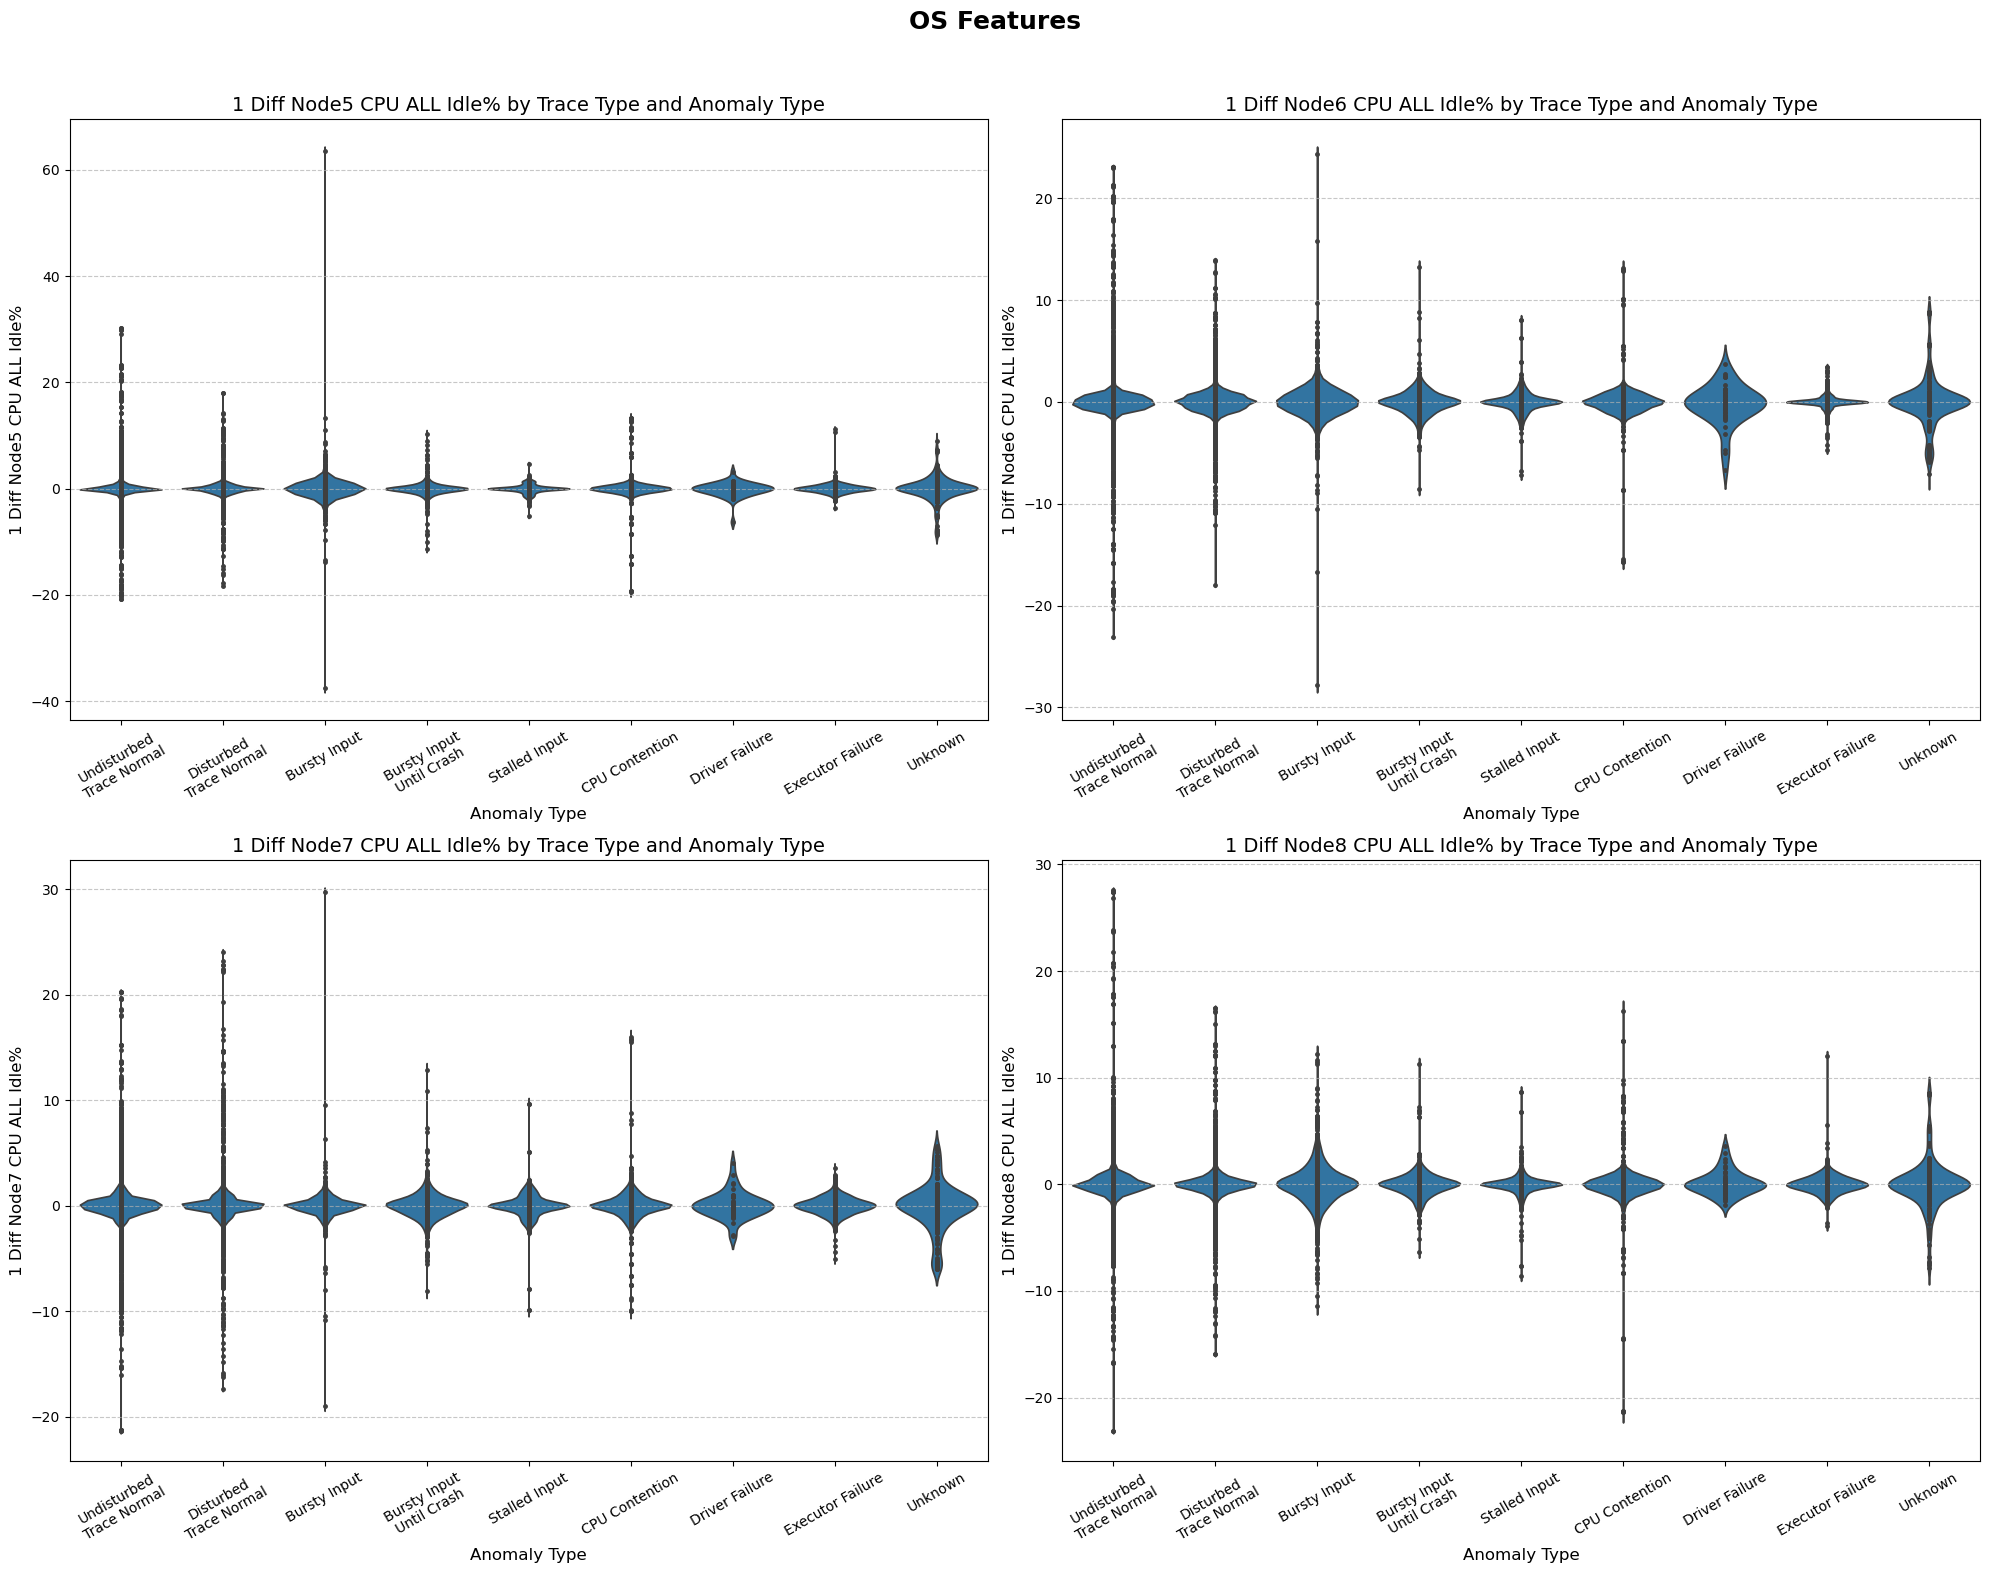

In [14]:
plot_feature_category(driver_features, driver_feature_name_mapping, 'Driver', df)
plot_feature_category(executor_features, executor_feature_name_mapping, 'Executor', df)
plot_feature_category(os_features, os_feature_name_mapping, 'OS', df)